In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score



In [2]:
file_path = "Modified_ObesityDataset_.csv"   # replace the path with the dataset path in your computer
data = pd.read_csv(file_path)

X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = GradientBoostingClassifier(n_estimators=111, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9836956521739131

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.95      0.97      0.96        61
           2       0.98      0.96      0.97        55
           3       0.98      1.00      0.99        64
           4       1.00      1.00      1.00        66
           5       1.00      1.00      1.00        59

    accuracy                           0.98       368
   macro avg       0.98      0.98      0.98       368
weighted avg       0.98      0.98      0.98       368



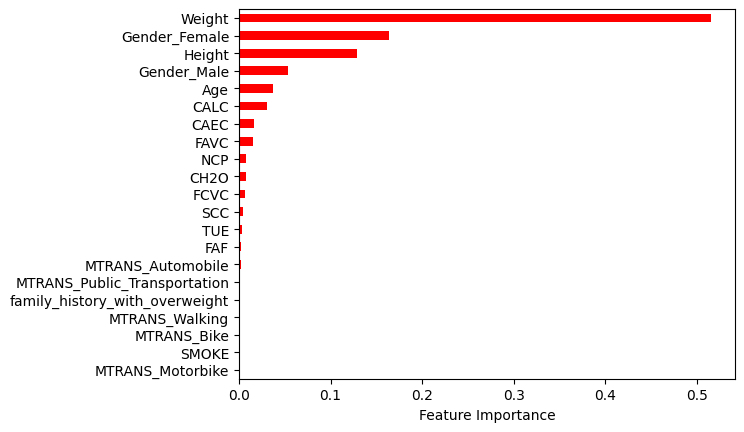

Feature Importance (in ascending order):
                                Importance
Weight                            0.515686
Gender_Female                     0.163960
Height                            0.128739
Gender_Male                       0.053274
Age                               0.037058
CALC                              0.030263
CAEC                              0.016756
FAVC                              0.015247
NCP                               0.007631
CH2O                              0.007153
FCVC                              0.006793
SCC                               0.004783
TUE                               0.003838
FAF                               0.002212
MTRANS_Automobile                 0.001883
MTRANS_Public_Transportation      0.001638
family_history_with_overweight    0.001404
MTRANS_Walking                    0.001061
MTRANS_Bike                       0.000520
SMOKE                             0.000080
MTRANS_Motorbike                  0.000021


In [9]:
import matplotlib.pyplot as plt

importance = pd.DataFrame({'Importance': clf.feature_importances_},
                          index=X.columns)

importance_sorted = importance.sort_values(by='Importance', axis=0, ascending=True)

importance_sorted.plot(kind='barh', color='r', legend=None)
plt.xlabel('Feature Importance')
plt.show()

importance_sorted = importance.sort_values(by='Importance', axis=0, ascending=False)
print("Feature Importance (in ascending order):")
print(importance_sorted)
